There did not appear to be much correlation in my paces over time, however I did see an increase in runs at lower pace zones. I am curious if there is any statistically significant difference in (1) my overall pace between 2023 and 2024, and (2) my overall pace for runs average heart rates in the different zones.

### Hypothesis testing on the overall pace between 2023 and 2024

In [106]:
# import packages and datasets
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from process_strava_data import load_run_data
%matplotlib inline

In [107]:
# load running dataset
runs_df = load_run_data()
runs_df.head()
runs_df.shape

(192, 20)

In [108]:
# filter runs by year and extract the average pace for each run
runs_df['avg_pace_s'] = runs_df['moving_time_s'] / runs_df['distance_mi']
avg_paces_2023 = runs_df[runs_df['year'] == 2023]['avg_pace_s']
avg_paces_2024 = runs_df[runs_df['year'] == 2024]['avg_pace_s']

print(f'Overall average pace in seconds in 2023: {avg_paces_2023.mean()}')
print(f'Overall average pace in seconds in 2024: {avg_paces_2024.mean()}')

Overall average pace in seconds in 2023: 508.31389268226036
Overall average pace in seconds in 2024: 524.6229290141899


Checking assumptions for a 2-sample t-test:
1. Independent samples - this assumption may not be fully met as previous runs may influence future runs (i.e. a long run on a sunday may cause a slower pace if another run is done the next day or the day after. We will still continue with the hypothesis testing despite this though. 

2. Normal distributions - Both the 2023 and 2024 average run paces do appear to follow an approximate normal distribution.

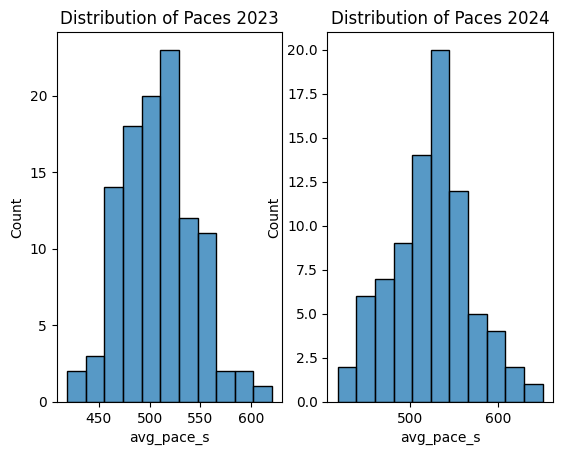

In [109]:
# plot pace distrubutions for 2023 and 2024 runs
fig, (ax1, ax2) = plt.subplots(1, 2)
sns.histplot(avg_paces_2023, ax=ax1)
ax1.set_title('Distribution of Paces 2023')
sns.histplot(avg_paces_2024, ax=ax2)
ax2.set_title('Distribution of Paces 2024')

plt.show()

3. Homogeneity assumption - This assumption appears to be met as the ratio of the average pace variance for 2023 and 2024 is less than 4:1 so we will consider that the given data groups have equal variance.

In [110]:
print(f'2023 variance: {np.var(avg_paces_2023)}\n2024 variance: {np.var(avg_paces_2024)}')

2023 variance: 1296.2224292530427
2024 variance: 1952.2820565967343


### Conducting the Hypothesis Test on the Overall Average Paces for the Years 2023 and 2024
$H_0$: $\mu_{2024}$ = $\mu_{2023}$ - The average pace in 2024 is equal to the average pace in 2023.

$H_A$: $\mu_{2024}$ < $\mu_{2023}$ - The average pace in 2024 is less than the average pace in 2023 (i.e. my average pace is faster in 2024).

In [111]:
stats.ttest_ind(avg_paces_2024, avg_paces_2023, alternative='less', equal_var=True)

TtestResult(statistic=np.float64(2.7869637320869716), pvalue=np.float64(0.9970667483089793), df=np.float64(188.0))

The p-value of 0.997 is much greater than our alpha of 0.05, which suggests that we have failed to reject the null hypothesis. Thus we cannot say that my overall average pace in 2024 is less than my overall average pace in 2023.

### Conducting the Hypothesis Test on the Zone 2 Average Paces for the Years 2023 and 2024

In [112]:
avg_zone2_paces_2023 = runs_df[(runs_df['year'] == 2023) & (runs_df['average_zone'] == 2)]['avg_pace_s']
avg_zone2_paces_2024 = runs_df[(runs_df['year'] == 2024) & (runs_df['average_zone'] == 2)]['avg_pace_s']
print(f'Zone 2 average pace in seconds in 2023: {avg_zone2_paces_2023.mean()}')
print(f'Zone 2 average pace in seconds in 2024: {avg_zone2_paces_2024.mean()}')
print(f'2023 zone 2 variance: {np.var(avg_zone2_paces_2023)}\n2024 zone 2 variance: {np.var(avg_zone2_paces_2024)}')

Zone 2 average pace in seconds in 2023: 520.2747324260068
Zone 2 average pace in seconds in 2024: 534.302749360721
2023 zone 2 variance: 1957.1922484372928
2024 zone 2 variance: 2704.285060425006


In [113]:
avg_zone2_paces_2024

110    583.225806
112    542.553191
113    536.500000
116    589.032258
118    650.295858
121    573.356401
122    453.881279
123    480.645161
127    519.580420
128    486.637931
129    527.035831
135    465.333333
139    457.552083
141    562.424242
145    454.237288
146    560.574949
149    601.075269
151    554.037267
155    463.043478
159    445.771144
161    547.111111
163    545.142857
164    613.333333
167    494.354839
170    578.763441
171    534.432234
174    541.887906
177    546.882217
180    580.686695
187    539.694656
Name: avg_pace_s, dtype: float64

### Conducting the Hypothesis Test on the Overall Average Paces for the Years 2023 and 2024
$H_0$: $\mu_{2024}$ = $\mu_{2023}$ - The average zone 2 pace in 2024 is equal to the average zone 2 pace in 2023.

$H_A$: $\mu_{2024}$ < $\mu_{2023}$ - The average zone 2 pace in 2024 is less than the average zone 2 pace in 2023 (i.e. my average pace is faster in 2024).

In [114]:
stats.ttest_ind(avg_zone2_paces_2024, avg_zone2_paces_2023, alternative='less', equal_var=True)

TtestResult(statistic=np.float64(0.9535957764275639), pvalue=np.float64(0.8274164160980259), df=np.float64(47.0))

The p-value of 0.827 is much greater than our alpha of 0.05, which suggests that we have failed to reject the null hypothesis. Thus we cannot say that my average zone 2 pace in 2024 is less than my average zone 2 pace in 2023.

### Conducting the Hypothesis Test on the Zone 3 Average Paces for the Years 2023 and 2024

In [115]:
avg_zone3_paces_2023 = runs_df[(runs_df['year'] == 2023) & (runs_df['average_zone'] == 3)]['avg_pace_s']
avg_zone3_paces_2024 = runs_df[(runs_df['year'] == 2024) & (runs_df['average_zone'] == 3)]['avg_pace_s']
print(f'Zone 3 average pace in seconds in 2023: {avg_zone3_paces_2023.mean()}')
print(f'Zone 3 average pace in seconds in 2024: {avg_zone3_paces_2024.mean()}')
print(f'2023 zone 3 variance: {np.var(avg_zone3_paces_2023)}\n2024 zone 3 variance: {np.var(avg_zone3_paces_2024)}')

Zone 3 average pace in seconds in 2023: 508.43234643666676
Zone 3 average pace in seconds in 2024: 522.3853135056125
2023 zone 3 variance: 1133.8598236097573
2024 zone 3 variance: 1111.7439325563162


### Conducting the Hypothesis Test on the Overall Average Paces for the Years 2023 and 2024
$H_0$: $\mu_{2024}$ = $\mu_{2023}$ - The average zone 3 pace in 2024 is equal to the average zone 3 pace in 2023.

$H_A$: $\mu_{2024}$ < $\mu_{2023}$ - The average zone 3 pace in 2024 is less than the average zone 3 pace in 2023 (i.e. my average pace is faster in 2024).

In [116]:
stats.ttest_ind(avg_zone3_paces_2024, avg_zone3_paces_2023, alternative='less', equal_var=True)

TtestResult(statistic=np.float64(2.1659541781353706), pvalue=np.float64(0.9838368776428272), df=np.float64(118.0))

The p-value of 0.983 is much greater than our alpha of 0.05, which suggests that we have failed to reject the null hypothesis. Thus we cannot say that my average zone 3 pace in 2024 is less than my average zone 3 pace in 2023.

### Conducting the Hypothesis Test on the Zone 4 Average Paces for the Years 2023 and 2024

In [117]:
avg_zone4_paces_2023 = runs_df[(runs_df['year'] == 2023) & (runs_df['average_zone'] == 4)]['avg_pace_s']
avg_zone4_paces_2024 = runs_df[(runs_df['year'] == 2024) & (runs_df['average_zone'] == 4)]['avg_pace_s']
print(f'Zone 4 average pace in seconds in 2023: {avg_zone4_paces_2023.mean()}')
print(f'Zone 4 average pace in seconds in 2024: {avg_zone4_paces_2024.mean()}')
print(f'2023 zone 4 variance: {np.var(avg_zone4_paces_2023)}\n2024 zone 4 variance: {np.var(avg_zone4_paces_2024)}')

Zone 4 average pace in seconds in 2023: 491.5033660080428
Zone 4 average pace in seconds in 2024: 491.25759956849515
2023 zone 4 variance: 638.3758161613562
2024 zone 4 variance: 1741.1817612365248


### Conducting the Hypothesis Test on the Overall Average Paces for the Years 2023 and 2024
$H_0$: $\mu_{2024}$ = $\mu_{2023}$ - The average zone 4 pace in 2024 is equal to the average zone 4 pace in 2023.

$H_A$: $\mu_{2024}$ < $\mu_{2023}$ - The average zone 4 pace in 2024 is less than the average zone 4 pace in 2023 (i.e. my average pace is faster in 2024).

In [118]:
stats.ttest_ind(avg_zone4_paces_2024, avg_zone4_paces_2023, alternative='less', equal_var=True)

TtestResult(statistic=np.float64(-0.01506617822984523), pvalue=np.float64(0.4940773951915286), df=np.float64(17.0))

The p-value of 0.494 is much greater than our alpha of 0.05, which suggests that we have failed to reject the null hypothesis. Thus we cannot say that my average zone 4 pace in 2024 is less than my average zone 4 pace in 2023.

There does not appear to be any statistically significant results that would indicate that my running in 2024 is faster than my running in 2023. 